<h1> Homework 10: Numerical PDEs <h1>

## Problem 2

A long conducting cylinder of radius $a$ is broken into six equal portions, each one spanning 60°. The segments are separated from one another by insulating spaces of negligible thickness. Each has potential of magnitude $V_0$ applied to them, but signs of the potentials alternate as shown in the figure. Running down the center of the cylinder is a wire of radius  which is held at potential $V_0$. Solve for the Laplace equation as a function of $r$ and $\theta$, the polar coordinates, for $a<r<b$

$$
\nabla^2 V = 0
$$

with the given boundary conditions. Find $V(r,\theta)$ first analytically using separation of variables and orthogonal functions; then solve it again numerically using the relaxation technique described in Problem 1.

In [1]:
import numpy as np
import scipy as sp

In [2]:
n = 240
V0 = 1.0

solution = np.zeros((n,n)) # a nxn matrix

# set the boundary conditions
solution[0,:] = V0

# set last row to be V0 for 1/6, then -V0 for 1/6, then V0 for 1/6, ...
for i in range(6):
    solution[-1,i*n//6:(i+1)*n//6] = (-1)**i * V0

In [3]:
# use the relaxation method to solve the Laplace equation. Remember that the boundary conditions are fixed and
for k in range(1000):
    for i in range(1,n-1):
        for j in range(n):
            if j == 0:
                solution[i,j] = 0.25 * (solution[i-1,j] + solution[i+1,j] + solution[i,j+1] + solution[i,n-1])
            elif j == n-1:
                solution[i,j] = 0.25 * (solution[i-1,j] + solution[i+1,j] + solution[i,j-1] + solution[i,0])
            else:
                solution[i,j] = 0.25 * (solution[i-1,j] + solution[i+1,j] + solution[i,j-1] + solution[i,j+1])

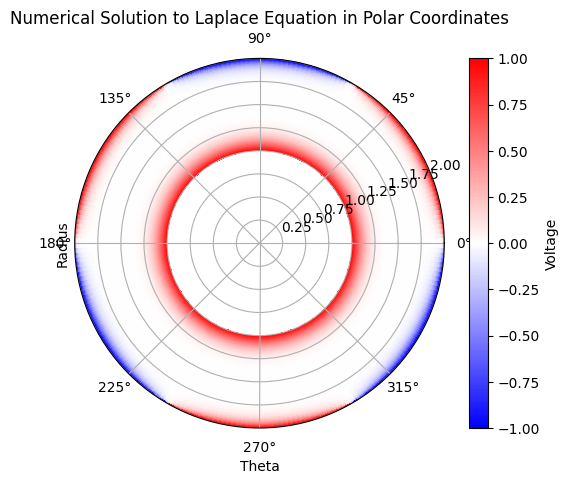

In [5]:
import matplotlib.pyplot as plt

# draw the solution in polar coordinates. solution has first row is r=b, last row is r=a. Columns are theta=0 to 2pi
a = 2
b = 1

# Define the theta values
theta = np.linspace(0, 2*np.pi, n+1)

# Define the r values
r = np.linspace(b, a, n+1)

# Create the polar plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

# Plot the heatmap so that positive values are red and negative values are blue
cax = ax.pcolormesh(theta, r, solution, cmap='bwr', vmin=-V0, vmax=V0)

# Add color bar so that positive values are red and negative values are blue
fig.colorbar(cax, ax=ax, label='Voltage')

# Add labels and title
ax.set_xlabel('Theta')
ax.set_ylabel('Radius')
ax.set_title('Numerical Solution to Laplace Equation in Polar Coordinates')

# Show the plot
plt.show()

## Problem 3

A slab of material has its surface at $x=0$ oscillate in temperature between $-T_1$ and $T_1$ as in

$$
T(x=0,t)=\left\{\begin{array}{ll}T_1 & 0<t\, \text{mod} \,\tau <\tau/2\\-T_1 & \tau/2<t\, \text{mod}\,\tau <\tau \end{array}\right.
$$

Find $T(x,t)$ for $x\geq 0$. Do this first analytically, then numerically using semi-discretization.

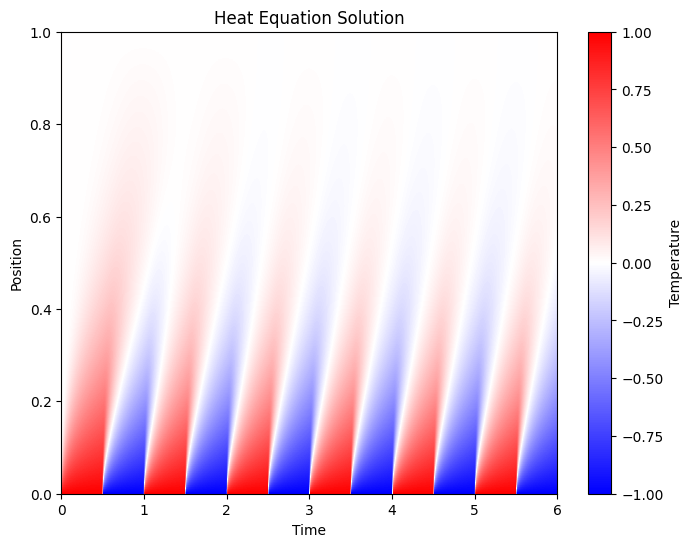

In [10]:
# use the semi-discrete method to solve the heat equation with the given boundary conditions

from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parameters
L = 1.0  # Length of the rod
Nx = 200  # Number of spatial grid points
alpha = 0.1  # Thermal diffusivity
tau = 1.0  # Time constant
T1 = 1  # Temperature at x=0

# Spatial grid
x = np.linspace(0, L, Nx)
dx = x[1] - x[0]

# Initial condition
u0 = np.zeros(Nx)

# Define the function for the spatial derivative
def dudt(t, u):
    if t % tau < tau / 2:
        u[0] = T1
    else:
        u[0] = -T1
    dudx2 = np.zeros_like(u)
    dudx2[1:-1] = (u[:-2] - 2 * u[1:-1] + u[2:]) / dx**2
    return alpha * dudx2

# Solve the heat equation using semi-discretization
sol = solve_ivp(dudt, [0, tau*6], u0, t_eval=np.linspace(0, tau*6, 1000))

# Plot the solution
plt.figure(figsize=(8, 6))
plt.imshow(sol.y, extent=[0, tau*6, 0, L], aspect='auto', cmap='bwr', origin='lower')
plt.colorbar(label='Temperature')
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Heat Equation Solution')
plt.show()